# Raíces de funciones

Buscamos los valores para $x$ donde $f(x) = 0$ para una función $f$ conocida. Estos valores se llaman *ceros* o *raíces* de $f$ y se denotan $\alpha$.

##### En general, los métodos para encontrar raíces son sucesiones que convergen a la raíz. Como son sucesiones, damos un valor inicial $x_0$. De acuerdo a que tan bueno sea la aproximación, será la rápidez del programa.

## Búsqueda incremental "Incremental search"

Está es una suceción muy arcaíca. Tomamos un punto inicial de la sucesión y luego nos movemos al siguiente punto con un dx. Evaluamos la función en estos puntos. Si hay un cambio de signo en estos dos puntos, hay una raíz en ese intervalo.

In [1]:
#Incremental Search (Escribe tu función)
def incremental(f,a,b,dx):
  # ...
    return [x1,contador]

Probemos nuestro método con la función: 
$$ f(x)=x^3-10x^2+5$$
con dx=0.2 (tolerancia) y evaluemos el intervalo [0,0.8]

In [2]:
def f(x):
    return x**3-10*x**2+5
print(incremental(f,0,0.8,1e-2))

#De acuerdo a Mathematica, el resultado con tolerancia 10-17 es 0.7346035077893032

[0.7300000000000004, 73.0]


In [3]:
import pandas as pd

lista_incremental = []
idx = []
valor_real=0.7346035077893032 #valor obtenido con tolerancia de 10-17
for i in range(1,6):
    tol = 10**(-i)
    idx.append(tol)
    raiz=incremental(f,0,0.8,tol) #cada renglon de la tabla
    error=(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %
0.10000,0.7000,7.0,4.710501
0.01000,0.7300,73.0,0.626666
0.00100,0.7340,734.0,0.082154
0.00010,0.7346,7346.0,0.000478
0.00001,0.7346,73460.0,0.000478


#### Ventajas

1. Cuando tenemos funciones con discontinuidades, llegamos al resultado. No necesitas más información (como derivadas).
2. ¡¡¡Llegas porque llegas a la raíz!!! Siempre converge

#### Desventajas
1. Requiere mucho cómputo para llegar a una buena solución.
2. ¡¡¡Es lento a más no poder!!! Convergencia lentísima

## Método de Bisección
Este método consiste en tomar un intervalo (a,b) y lo iremos cortando por la mitad hasta que se encuentre la raíz. Este método se repetirá hasta que se cumpla la tolerancia.
$$
\left|x_2 - x_1 \right| \leq \epsilon
$$

Suponemos
1. la función $f$ tiene al menos un cero en el intervalo de prueba $[a, b]$
2. $f$ es continua en $[a, b]$
3. Tenemos un *error aceptable* o *tolerancia* $\epsilon > 0$ y buscamos una raiz aproximada $\tilde \alpha$ con
$$ |x_n - \tilde \alpha| \le \epsilon $$
4. También suponemos que $f$ cambia signo en $[a, b]$, es decir
$$ f(a) f(b) < 0 $$
o
$$ \sgn f(a) = -\sgn f(b) $$

In [5]:
#Biseccion
def biseccion(f,a,b,epsilon):
    f=x**2+2
    return [x, contador]

In [6]:
print(biseccion(f,0,0.8,2e-4))

NameError: name 'f' is not defined

In [6]:
l_biseccion = []
idx = []
valor_real=0.7346035077893032 #valor obtenido con tolerancia de 10-17
for i in range(1,6):
    tol = 10**(-i)
    idx.append(tol)
    raiz=biseccion(f,0,0.8,tol) #cada renglon de la tabla
    error=(abs(valor_real-raiz[0])/valor_real)*100
    l_biseccion.append([raiz[0],raiz[1],error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %
0.10000,0.700000,3,4.710501
0.01000,0.731250,7,0.456506
0.00100,0.735156,10,0.075244
0.00010,0.734668,13,0.008775
0.00001,0.734601,17,0.000365


#### Ventajas

1. Siempre converge
2. Límite de error garantizado, baja con cada iteración.
3. ¡¡¡ Error se reduce a un medio con cada iteración !!!


#### Desventajas
1. Convergencia lenta para funciones con multiples derivadas continuas en la región del cero $\alpha$.


### Estimación del error cuando no tenemos la solución real.

El intervalo incial es $[a_1, b_1]$. Los intervalos siguientes son $[a_j, b_j]$ con centro $c_j$. Tal que
$$ |\alpha - c_j| \le b_j - c_j = c_j - a_j =  \frac{1}{2}(b_j - a_j)$$

Por inducción tenemos
$$ |\alpha - c_n| = \left(\frac{1}{2}\right)^n (b_1 - a_1) $$

### Ejemplo

Busamos el cero más grande de 
$$ f(x) = x^6 - x -1 $$
con error $\epsilon = 0.001$. El cero se encuentra en $[1, 2]$, $f(1) = -1$, $f(2) = 61$.

In [7]:
import numpy as np
import pylab as plt
x = np.linspace(1, 2)
#x = np.linspace(1, 1.3)
def poly1(x):
    return x**6 - x - 1
plt.plot(x, poly1(x), 'cyan')
plt.axhline(y=0)

In [8]:
def bisect_tabla(f, a, b, eps):
    c = 0.5 * (b + a)
    res = [[a, b, c, f(c)]]
    while b - c > eps:
        if f(b) * f(c) >= 0:
            b = c
        else:
            a = c
        c = 0.5 * (b + a)
        res.append([a, b, c, f(c)])
    return res
res = bisect_tabla(poly1, 1, 2, 0.001)
pd.DataFrame(res, index=range(1, len(res)+1),
             columns=["a", "b", "c", "f(c)"])

,a,b,c,f(c)
1,1.000000,2.000000,1.500000,8.890625
2,1.000000,1.500000,1.250000,1.564697
3,1.000000,1.250000,1.125000,-0.097713
4,1.125000,1.250000,1.187500,0.616653
5,1.125000,1.187500,1.156250,0.233269
6,1.125000,1.156250,1.140625,0.061578
7,1.125000,1.140625,1.132812,-0.019576
8,1.132812,1.140625,1.136719,0.020619
9,1.132812,1.136719,1.134766,0.000427
10,1.132812,1.134766,1.133789,-0.009598


### Otra estimación para convergencia

Tenemos $[a, b] = [1, 2]$ y $\epsilon = 1\times 10^{-5}$. Que número $n$ de iteraciones necesitamos para tener
$$ |\alpha - c_n| \le \epsilon $$
Usamos
$$ |\alpha - c_n| = \left(\frac{1}{2}\right)^n (b - a) $$
Entonces tenemos la condición
$$ \left(\frac{1}{2}\right)^n (b - a) \le \epsilon $$
$$ \left(\frac{1}{2}\right)^n (2 - 1) \le 1e-5$$
$$ n \ge \log\left(\frac{1}{1e-5}\right) = 17 $$
Entonces se requieren $n = 16$ iteraciones para obterner la precisión deseada.

In [9]:
from math import log
x=1/1e-5
print(log(x,2))

16.609640474436812


## Método de Newton-Raphson

Es uno de los mejores y más rápidos métodos para encontrar raíces. Este método usa la expansión en series de Taylor.

$$
f(x_{i+1})=f(x_i)+f'(x_{i})(x_{i+1}-x_i)+O(x_{i+1}-x_i)^2
$$

Si $x_{i+1}$ es la raíz $f(x_{i+1})=0$, nos quedamos sólo con los términos lineales

$$
0=f(x_i)+f'(x_i)(x_{i+1}-x_i)
$$

Despejamos $x_{i+1}$

$$
x_{i+1}=x_{i}-\frac{f(x_i)}{f'(x_i)}
$$

Y esta es nuestra sucesión que se tendrá que programar.

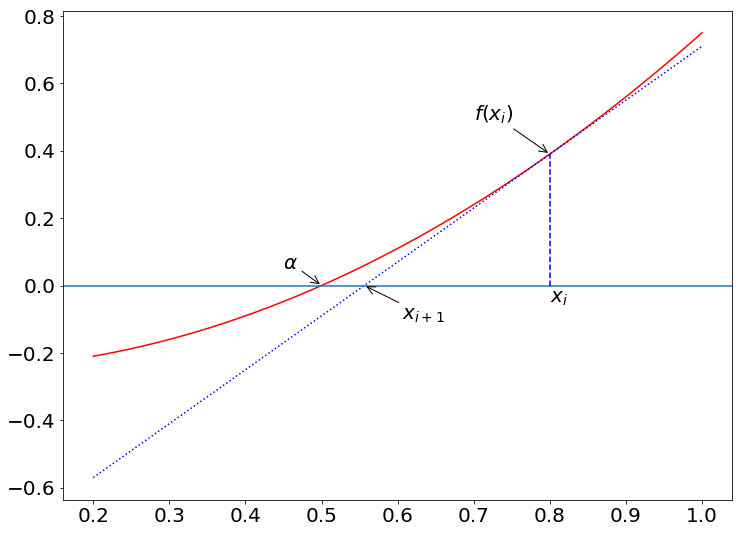

In [10]:
# matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9] # ancho, alto de figuras
plt.rcParams["font.size"] = 20
# Plot metodo de Newton
def funcion(x):
    return x**2 - 0.25
def taylor(x, x0):
    sl = 2*x0
    return sl*x - sl*x0 + funcion(x0)
def fp0(x0):
    sl = 2*x0
    return x0 - funcion(x0)/sl

def fplot():
    x0 = 0.8
    x = np.linspace(0.2, 1)
    plt.plot(x, funcion(x), 'r', x, taylor(x, x0), 'b:')
    plt.axhline();
    plt.annotate(r"$\alpha$", xy=[0.5, 0], xytext=[0.45, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    plt.annotate(r"$x_{i+1}$", xy=[fp0(x0), 0], xytext=[fp0(x0)+0.05, -0.1],
                 arrowprops=dict(arrowstyle='->'),)
    plt.annotate(r"$x_{i}$", xy=[x0, 0], xytext=[x0, -0.05],)
    plt.annotate(r"$f(x_{i})$", xy=[x0, funcion(x0)], xytext=[x0 - 0.1, funcion(x0) + 0.1],
                 arrowprops=dict(arrowstyle='->'),);
    plt.plot([x0, x0], [0, funcion(x0)], 'b--')

fplot()

In [11]:
def newton(f,df,x,epsilon=1e-6):
### . ..
    return [x,contador]

In [12]:
f=lambda x: x**3-10*x**2+5
df=lambda x: 3*x**2-20*x
print(incremental(f,0,0.8,1e-2))
print(biseccion(f,0,0.8,1e-2))
print(newton(f,df,0.8,1e-2))

[0.7300000000000004, 73.0]
[0.7312500000000001, 7]
[0.7346067297543346, 2]


### Ejemplo

$$ f(x) = x^6 - x - 1 = 0 $$
Buscamos la solución positiva $\alpha$ de esta ecuación. Usamos una gráfica de $f$ para encontrar un estimado inicial.

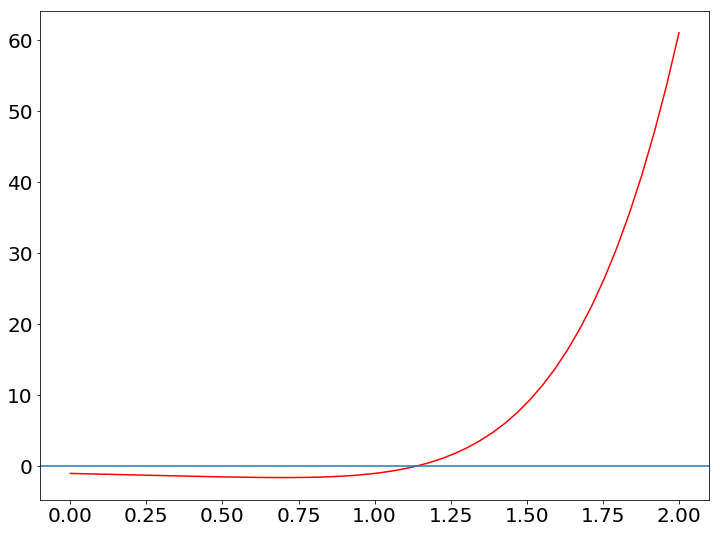

In [13]:
def ff(x):
    return x**6 - x - 1
def ffp(x):
    return 6*x**5 - 1

def ffplot():
    x = np.linspace(0, 2)
    fig, ax = plt.subplots() # figsize=[10, 7])
    ax.plot(x, ff(x), 'r')
    ax.axhline()
ffplot()

Usamos como estimado inicial $x_0=1.5$

In [14]:
def newton(f, df, x, epsilon=1e-10):
    ff = f(x)
    res = [[x, ff, np.nan]]
    xn = x
    while True:
        xnp1 = xn - ff / df(xn)
        ff = f(xnp1)
        res.append([xnp1, ff, xnp1-xn])
        if abs(ff) < epsilon:
            break
        xn = xnp1
    return res
def ff(x):
    return x**6 - x - 1
def ffp(x):
    return 6*x**5 - 1
res = newton(ff, ffp, 1.5)
pd.DataFrame(res, index=range(len(res)), columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,1.500000,8.890625e+00,NaN
1,1.300491,2.537264e+00,-1.995091e-01
2,1.181480,5.384586e-01,-1.190105e-01
3,1.139456,4.923525e-02,-4.202483e-02
4,1.134778,5.503239e-04,-4.677965e-03
5,1.134724,7.113585e-08,-5.347992e-05
6,1.134724,1.554312e-15,-6.914698e-09


#### Ventajas

1. Convergencia rápida en la mayoría de los casos.
2. Formulación sencilla, por lo tanto fácil de usar y programar.
3. Construcción intuitiva. Entonces fácil de entender su comportamiento y convergencia.

#### Desventajas

1. No siempre converge.
2. Problematico cuando $f'(\alpha) = 0$. En este caso, el eje $x$ es tangente a $f$ en $\alpha$.
3. Require el conocimiento de $f(x)$ y de $f'(x)$. En comparación, el metodo de bisección requiere solamente $f(x)$.

## Estimación del error

Usamos la expansión de Taylor cerca de $x = x_n$ para calcular $f(\alpha)$.
\begin{align}
0 &= f(\alpha)\\
  &= f(x_n) + (\alpha - x_n) f'(x_n) + \frac{1}{2} (\alpha - x_n)^2 f''(c_n)\\
\end{align}
con $c_n$ entre $\alpha$ y $x_n$. Dividimos por $f'(x_n)$ para obtener:
$$ 0 = \frac{f(x_n)}{f'(x_n)} + \alpha - x_n + (\alpha - x_n)^2 \frac{f''(c_n)}{2 f'(x_n)} $$
Utilizamos 
$$ \frac{f(x_n)}{f'(x_n)} - x_n = - x_{n+1} $$
y obtenemos
$$ \alpha - x_{n+1} = -\frac{f''(c_n)}{2 f'(x_n)} (\alpha - x_n) ^2 $$


Para $x_n$ cerca de $\alpha$ tenemos $c_n$ cerca de $\alpha$.
$$ \alpha - x_{n+1} \approx = -\frac{f''(\alpha)}{2f'(\alpha)} (\alpha - x_n)^2 $$
Eso nos dice que el metodo de Newton tiene *convergencia cuadrática* con las condiciones
1. $f'(\alpha) \not= 0$
2. $f$ puede diferenciarse dos veces en la vecindad de $\alpha$.